In [1]:
from src.utils_data import *
import matplotlib.pyplot as plt
import numpy as np

## Comparison bool vs base model on two datasets

In [2]:
losses = get_loss_predictions("predictions/")

In [5]:
print(losses)

{'base_1279.csv': 3.3781664709693757, 'base_200.csv': 4.867127501953704, 'pool_1279.csv': 2.7075806992960736, 'pool_200.csv': 4.218169148586952}


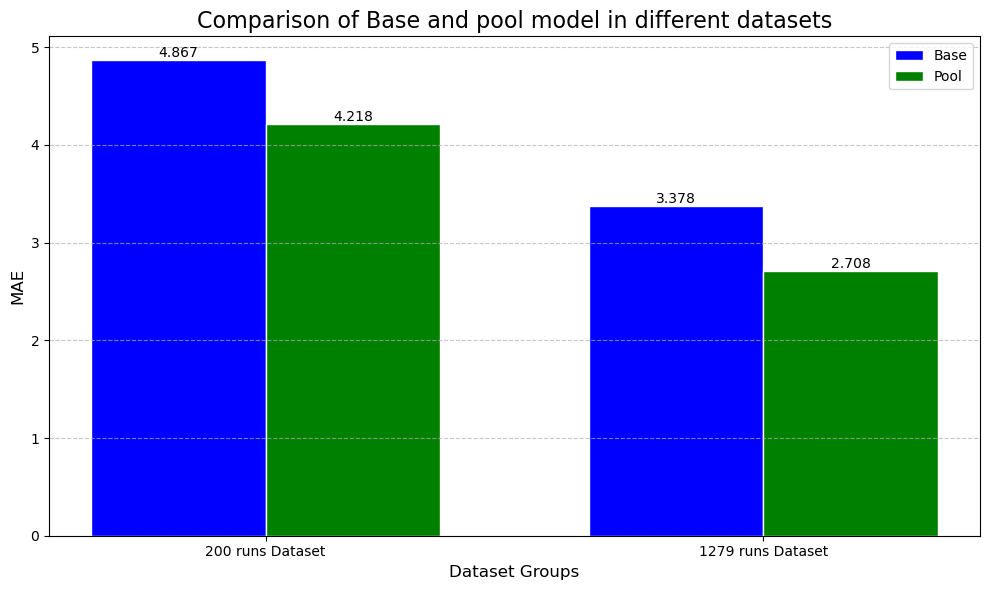

In [37]:
# Prepare data for grouped bar plot
groups = [
    ('base_200.csv', 'pool_200.csv'),
    ('base_1279.csv', 'pool_1279.csv')
]

# Create the plot
plt.figure(figsize=(10, 6))

# Set width of bars
bar_width = 0.35

# Set positions of bars on X axis
r1 = np.arange(len(groups))
r2 = [x + bar_width for x in r1]

# Create grouped bar plot
plt.bar(r1, [losses[groups[0][0]], losses[groups[1][0]]], color='blue', width=bar_width, edgecolor='white', label='Base')
plt.bar(r2, [losses[groups[0][1]], losses[groups[1][1]]], color='green', width=bar_width, edgecolor='white', label='Pool')

# Add value labels on top of each bar
for i, group in enumerate(groups):
    # Base bar
    plt.text(r1[i], losses[group[0]], f'{losses[group[0]]:.3f}', 
             ha='center', va='bottom')
    # Pool bar
    plt.text(r2[i], losses[group[1]], f'{losses[group[1]]:.3f}', 
             ha='center', va='bottom')

# Customize the plot
plt.xlabel('Dataset Groups', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.title('Comparison of Base and pool model in different datasets', fontsize=16)
plt.xticks([r + bar_width/2 for r in range(len(groups))], ['200 runs Dataset', '1279 runs Dataset'])

# Add a legend
plt.legend()

# Add a grid for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adjust layout and display
plt.tight_layout()
plt.show()

# Looking at the effect of data

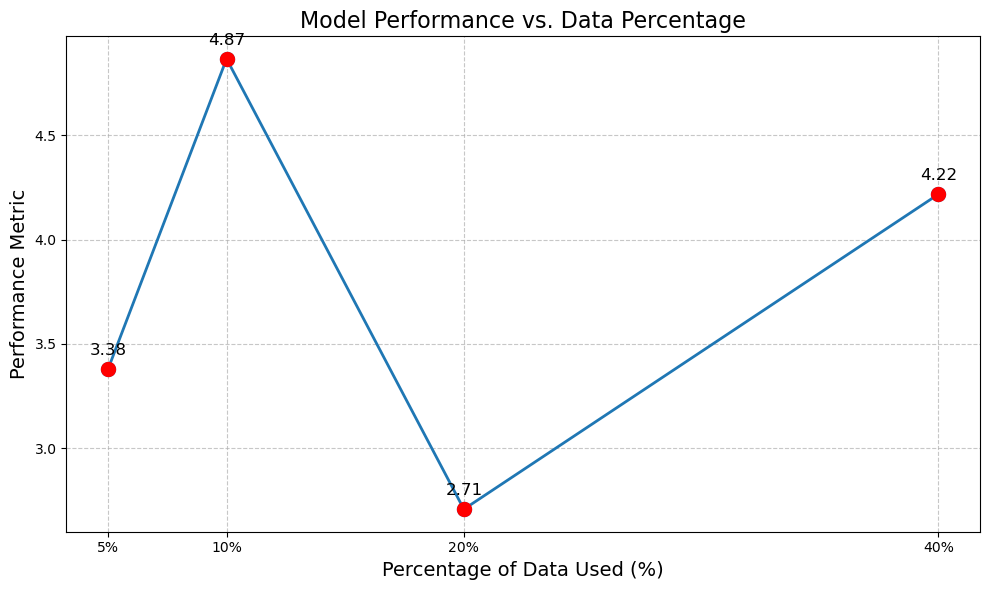

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# Your data
data_percentages = {
    '5%': 3.3781664709693757, 
    '10%': 4.867127501953704, 
    '20%': 2.7075806992960736, 
    '40%': 4.218169148586952
}

# Convert the keys to numeric values for plotting
x_values = [float(k.strip('%')) for k in data_percentages.keys()]
y_values = list(data_percentages.values())

# Sort the data by x values
sorted_indices = np.argsort(x_values)
x_values = [x_values[i] for i in sorted_indices]
y_values = [y_values[i] for i in sorted_indices]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, marker='o', linestyle='-', linewidth=2, markersize=10)
plt.scatter(x_values, y_values, s=100, c='red', zorder=5)

# Add title and labels
plt.title('Model Performance vs. Data Percentage', fontsize=16)
plt.xlabel('Percentage of Data Used (%)', fontsize=14)
plt.ylabel('Performance Metric', fontsize=14)

# Customize the grid
plt.grid(True, linestyle='--', alpha=0.7)

# Add text annotations for each point
for i, (x, y) in enumerate(zip(x_values, y_values)):
    plt.annotate(f'{y:.2f}', (x, y), textcoords="offset points", 
                 xytext=(0, 10), ha='center', fontsize=12)

# Set the x-axis to show percentage points
plt.xticks(x_values, [f'{int(x)}%' for x in x_values])

# Improve the layout
plt.tight_layout()

# # Optional: add shaded area under the curve
# plt.fill_between(x_values, y_values, alpha=0.2, color='blue')

plt.savefig('model_performance_vs_data.png', dpi=300, bbox_inches='tight')
plt.show()